In [1]:
from ImageAnal import *
%matplotlib widget

In [2]:
datapath = os.getcwd() + '/'  # current working directory - look for data and strings
date_time = '2021-11-02_17-02-32'  # date and time of the imaging session
name = 'KS028'  # mouse name
task = 'NearFarLong'  # task name

# locate the suite2p folder
suite2p_folder = datapath + 'data/' + name + '_imaging/KS028_110221/'

# the name and location of the imaging log file
imaging_logfile_name = suite2p_folder + 'KS028_TSeries-11022021-1017-001.xml'

# the name and location of the trigger voltage file
TRIGGER_VOLTAGE_FILENAME = suite2p_folder + 'KS028_TSeries-11022021-1017-001_Cycle00001_VoltageRecording_001.csv'

D1 = ImagingSessionData(datapath, date_time, name, task, suite2p_folder, imaging_logfile_name, TRIGGER_VOLTAGE_FILENAME)

trigger logfile loaded
trigger voltage signal loaded
triggers after: 24
n_extra_indexes 5
candidate log indexes [0, 99, 144]
min recorded trigger length: 0.010800000000074306
relevant behavior located, lap time of the first frame: 332.40123800000003 , log reference index: 99
slight warning - testing some late candidates failed
suite2p data loaded
corrected offset: 332.39923800000327 voltage_delay: 0.00199999999676947
single-plane
suite2p time axis loaded
calculating dF/F and SNR...


/media/martin/SSD Windows/home/idegi_jelatvitel/ABmice/ImageAnal.py:493: RuntimeWarning: invalid value encountered in true_divide
  self.dF_F[i_cell,] = (self.F[i_cell,] - baseline) / baseline


SNR done
dF/F calculated for cell ROI-s
length of frame_times: 17994
length of frame_laps: 17994
shape of dF_F: (752, 17994)
Short lap found, we have total  778 position bins recorded by the ExpStateMachine in a lap before lap 143
laps with im data:  [ 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122]
calculating rate, reliability and Fano factor...
calculating Skaggs spatial info...
calculating proportion of active laps...
calculating proportion of active laps based on dF/F ...
calculating linear tuning specificity ...
calculating rate, reliability and Fano factor...
calculating Skaggs spatial info...
calculating proportion of active laps...
calculating proportion of active laps based on dF/F ...

In [3]:
print(D1.n_laps)  # number of laps in sesh
print(D1.i_Laps_ImData)  # ids of laps with imaging
print(len(D1.i_Laps_ImData))

143
[ 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122]
85


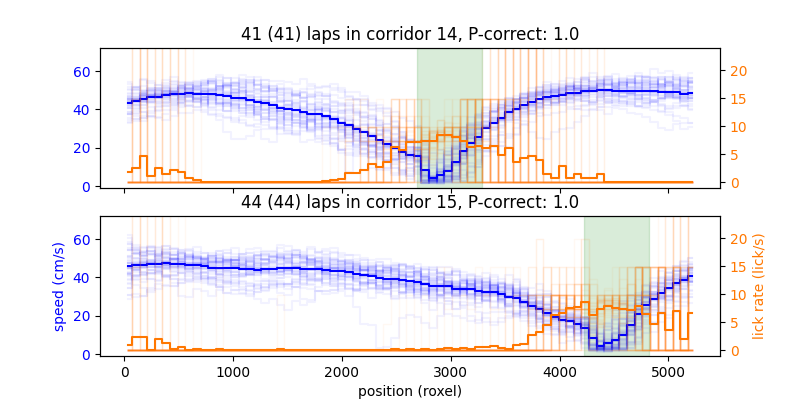

In [5]:
D1.plot_session(selected_laps=D1.i_Laps_ImData)

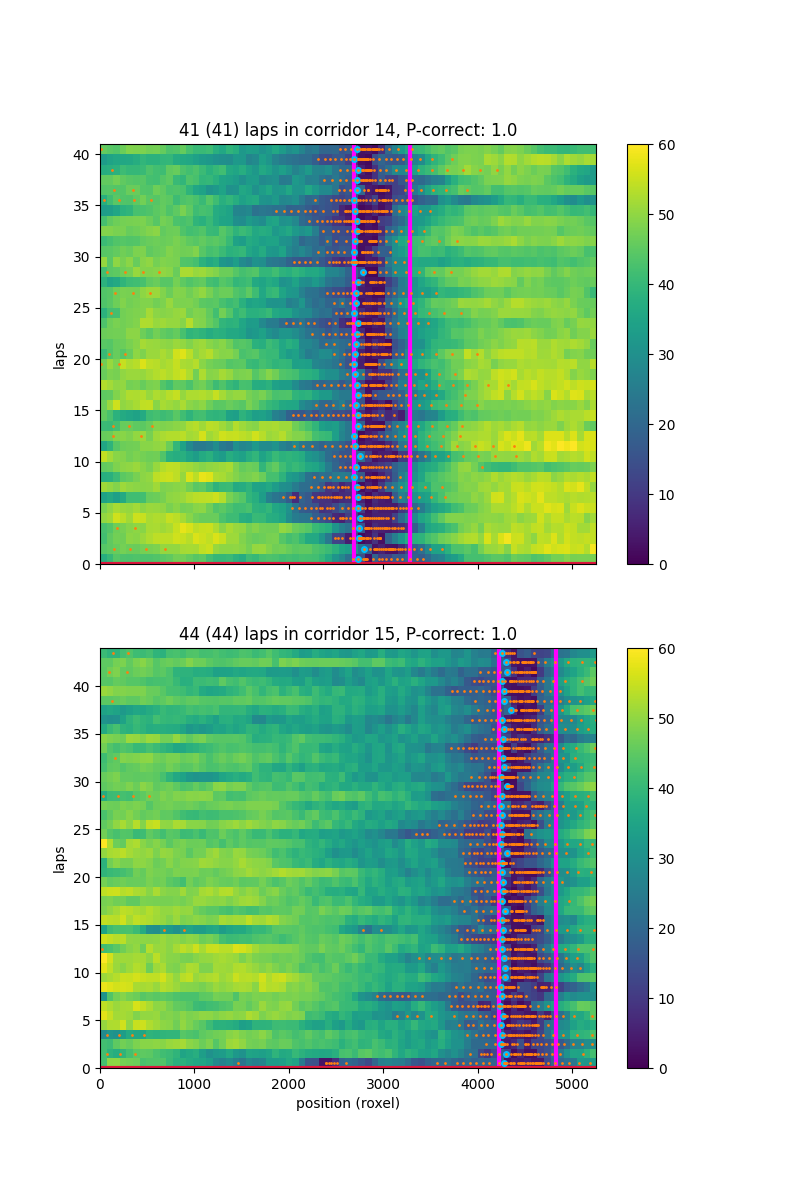

In [6]:
D1.plot_session(selected_laps=D1.i_Laps_ImData, average=False)

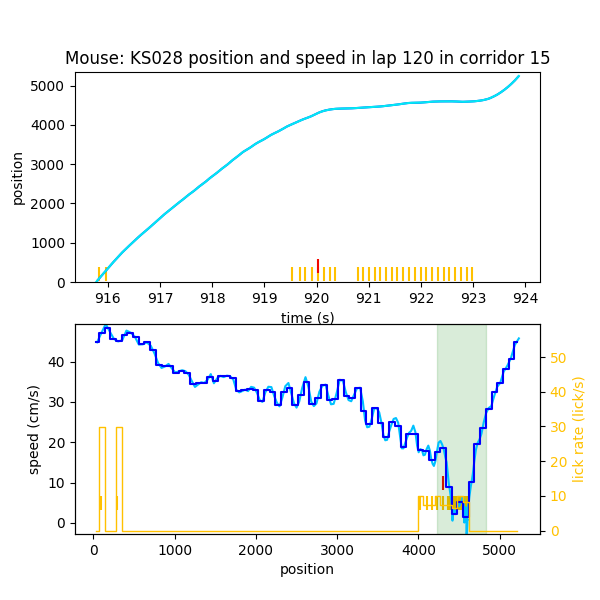

In [7]:
D1.ImLaps[120].plot_txv()

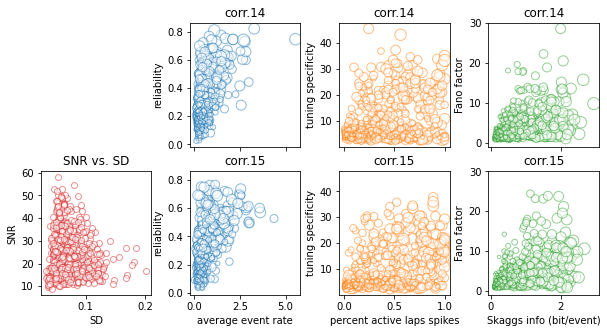

In [14]:
D1.plot_properties()

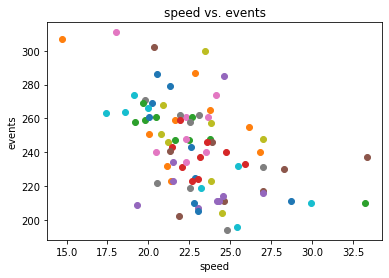

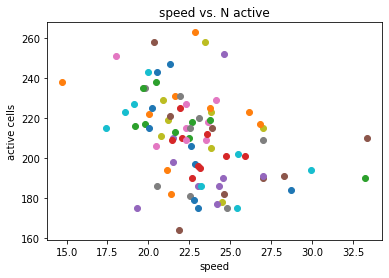

In [15]:
D1.speed_vs_activity()
# x axis = average speed in a lap
# y axis = signficant DF/F on top, number of active cells on bottom
# each individual dot = lap

In [22]:
[print(key) for key in sorted(D1.__dict__.keys())]

F
F_all
ImLaps
N_ImLaps
N_all_corridors
N_cells
N_corridors
N_events
N_pos_bins
accepted_PCs
active_cells
activity_tensor
activity_tensor_time
all_corridor_start_IDs
all_corridor_start_time
all_corridors
anticipatory
candidate_PCs
cell_Fano_factor
cell_SDs
cell_SNR
cell_activelaps
cell_activelaps_df
cell_baselines
cell_corridor_selectivity
cell_corridor_similarity
cell_rates
cell_reliability
cell_skaggs
cell_tuning_specificity
corridor_length_cm
corridor_length_roxel
corridor_list
corridors
dF_F
datapath
date_time
elfiz
even_odd_rate_calculated
events
frame_laps
frame_maze
frame_pos
frame_times
i_Laps_ImData
i_corridors
im_reftime
imaging_logfile_name
imstart_time
iscell
last_zone_end
last_zone_start
minimum_Nlaps
n_laps
name
neuron_index
ops_string
randseed
ratemaps
raw_activity_tensor
raw_activity_tensor_time
raw_spks
selected_laps
sessionID
speed_factor
speed_threshold
spks
spks_all
stage
stage_list
stages
start_end_rate_calculated
stat_string
substage_change_laps
substage_change_ti

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

In [23]:
D1.N_cells

752

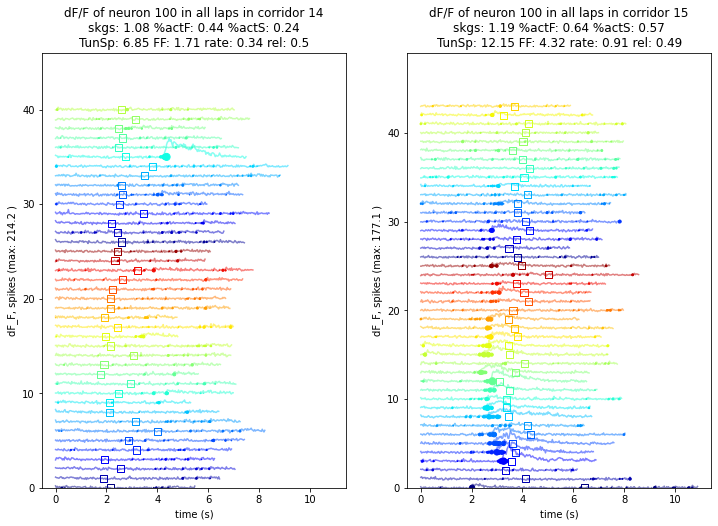

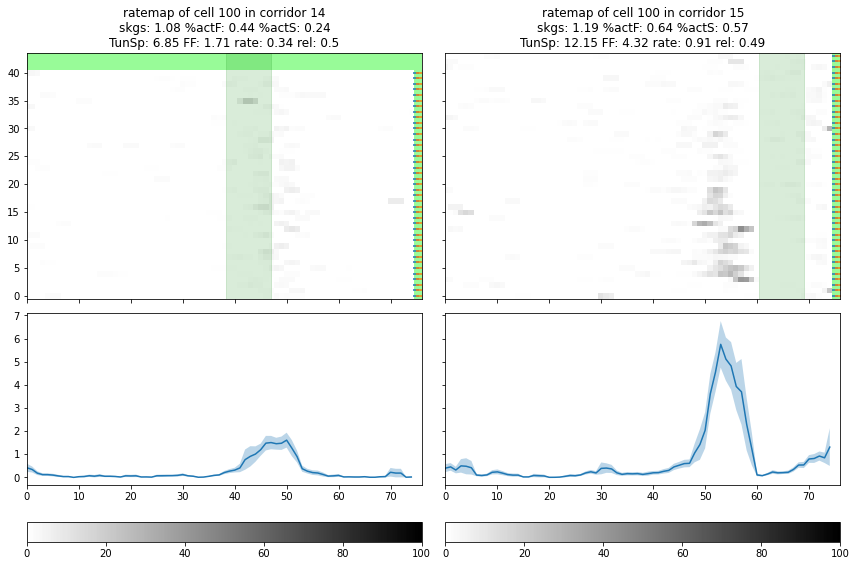

In [32]:
D1.plot_cell_laps(cellid=100)
D1.plot_cell_laps(cellid=100, signal="rate")

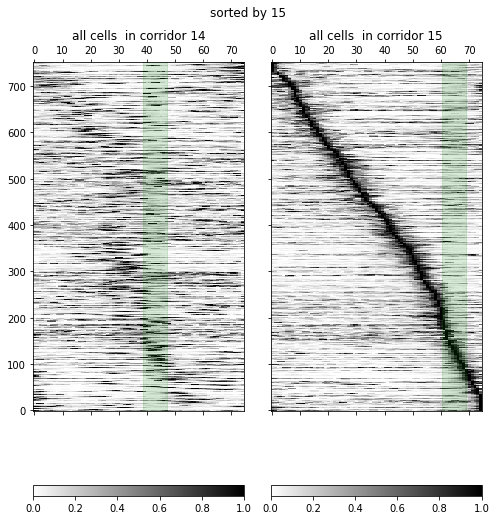

In [149]:
ratemaps = D1.plot_ratemaps(sorted=True, normalized=True, corridor_sort=15)

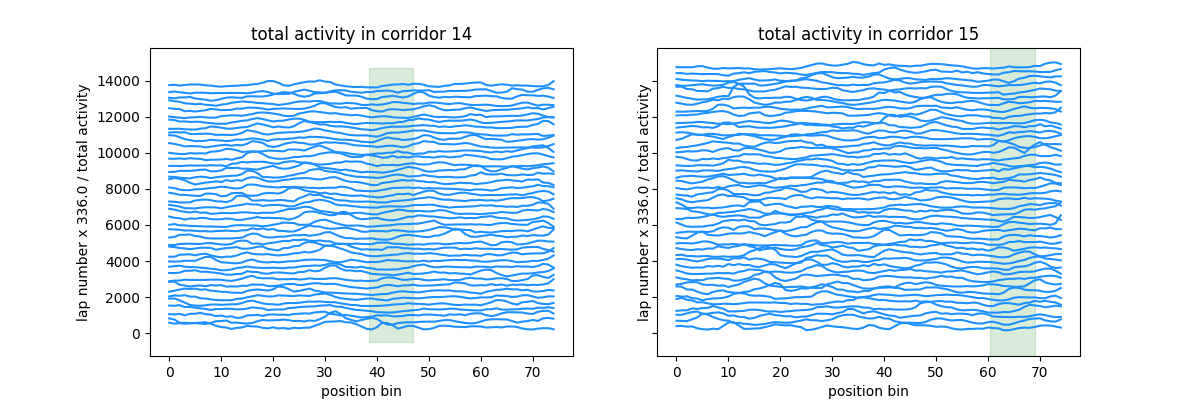

In [9]:
D1.plot_popact(cellids=D1.active_cells, bylaps=True)

<class 'numpy.ndarray'>


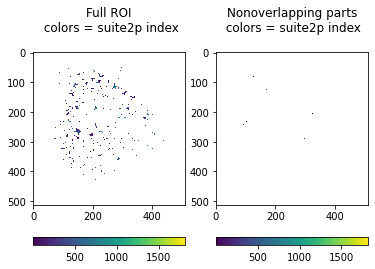

In [57]:
D1.plot_masks(cellids=D1.active_cells)

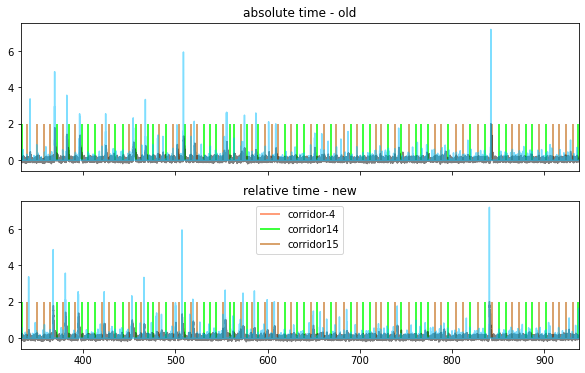

In [60]:
D1.plot_dF_lapstarts(cellid=100)

even/odd ratemaps already calculated


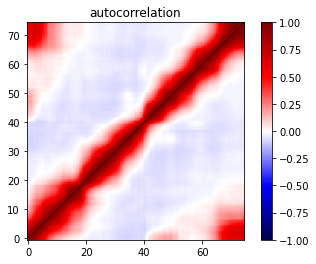

In [80]:
D1.calc_even_odd_rates()
D1.show_autocorr(D1.ratemaps[0])

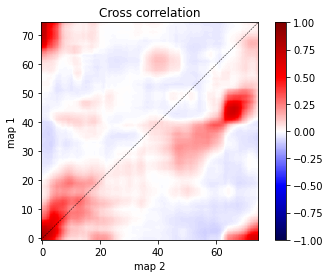

In [81]:
D1.show_crosscorr(D1.ratemaps[0], D1.ratemaps[1])

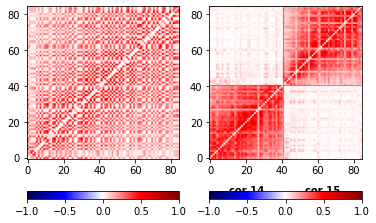

In [84]:
D1.lap_correlate(cellids=D1.active_cells)

In [89]:
cellids = D1.active_cells
D1.calc_shuffle(cellids[0:3], 20, 'shift', batchsize=1)
place_cells = np.union1d(D1.accepted_PCs[0], D1.accepted_PCs[1])

calculating shuffles...
calculating minibatch 0, batch length:  1
Short lap found, we have total  778 position bins recorded by the ExpStateMachine in a lap before lap 143
corridors:  [14 15] ; number of corridors: 2
calculating rate, reliability and Fano factor...
calculating Skaggs spatial info...
calculating proportion of active laps...
calculating linear tuning specificity ...
calculating rate, reliability and Fano factor...
calculating Skaggs spatial info...
calculating proportion of active laps...
calculating linear tuning specificity ...
calculating corridor selectivity ...
calculating corridor similarity ...  Number of corridors: 2
calculating minibatch 1, batch length:  2
Short lap found, we have total  778 position bins recorded by the ExpStateMachine in a lap before lap 143
corridors:  [14 15] ; number of corridors: 2
calculating rate, reliability and Fano factor...
calculating Skaggs spatial info...
calculating proportion of active laps...
calculating linear tuning specific

array([0, 1, 2])

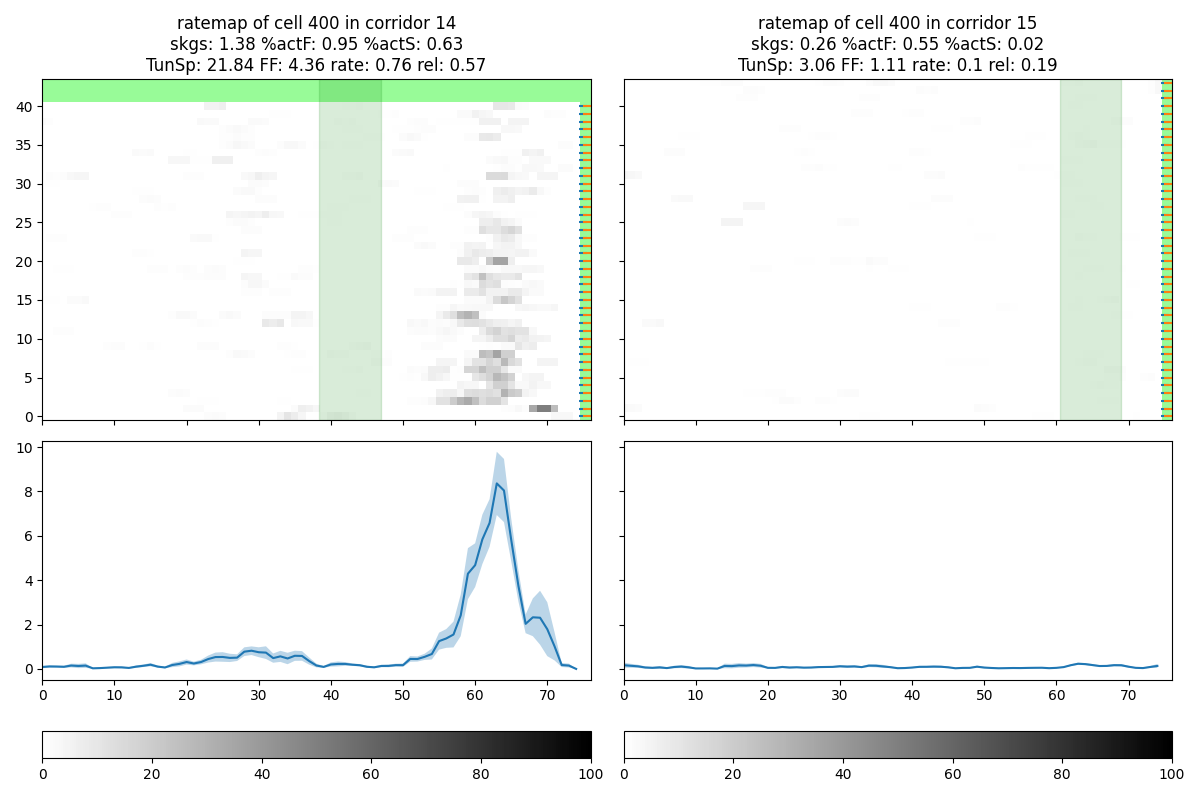

In [25]:
D1.plot_cell_laps(cellid=400, signal="rate")

In [146]:
D1.active_cells

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,
        27,  29,  30,  31,  33,  34,  36,  37,  38,  40,  41,  42,  43,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  63,  64,  65,  66,  67,  68,  69,  70,  72,
        73,  74,  75,  77,  78,  80,  81,  82,  83,  84,  85,  88,  89,
        90,  92,  93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 156, 157, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 176, 178, 179, 180, 181, 182, 183,
       184, 186, 189, 190, 192, 193, 194, 195, 196, 198, 199, 200, 201,
       202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

In [147]:
D1.N_cells

752